# -- "Evolutionary Algorithm Performance Analyzer"

# Code Block 1: Importing Required Libraries

In this code block, we import two essential Python libraries to support our optimization and data visualization tasks.

## 1. numpy (Numerical Python)
- **Purpose:** This library is a fundamental package for scientific computing in Python.
- **Functionality:** It provides support for arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **Usage:** We will utilize numpy for efficient data manipulation and mathematical operations during the optimization process.

## 2. matplotlib.pyplot
- **Purpose:** This library is a popular data visualization tool in Python.
- **Functionality:** It allows you to create various types of plots, charts, and graphs for data visualization and analysis.
- **Usage:** matplotlib.pyplot will be employed to visualize the performance and results of our optimization algorithms.

These libraries serve as the foundation for conducting optimization and creating insightful visualizations of the optimization process.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Code Block 2: Adding Problems and Parameters for PSO and GWO

In this code block, we set up different optimization problems and parameters for the Particle Swarm Optimization (PSO) and Grey Wolf Optimization (GWO) algorithms. It allows users to configure various problem instances and algorithm settings for experimentation.

## Purpose:
- This code block serves the purpose of defining the problems and parameters that will be used to test the PSO and GWO optimization algorithms.

## Configuration:
- You can define different optimization problems by specifying the number of dimensions, particles, and iterations.
- You can also adjust the algorithm parameters, such as inertia weight, cognitive weight, and social weight for PSO.

## Customization:
- To experiment with different optimization scenarios, you can customize the following:
  - `num_dimensions`: The number of dimensions for the optimization problem.
  - `num_particles`: The number of particles in the PSO algorithm.
  - `num_iterations`: The number of iterations for both PSO and GWO.
  - `inertia_weight`: The inertia weight for PSO to balance exploration and exploitation.
  - `cognitive_weight`: The cognitive weight for personal best update in PSO.
  - `social_weight`: The social weight for global best update in PSO.

By customizing these parameters and problem instances, users can explore the behavior of the PSO and GWO algorithms for different optimization scenarios and benchmark their performance on various optimization problems.


In [22]:
# Desired Optimization problem.
def sphere_function(x):
    return np.sum(x ** 2)

#Parameters for GWO function

num_wolves = 30
num_dimensions = 2
num_iterations = 100

#Parameters for PSO function

dim = 2
num_particles = 30
num_iterations = 100
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5


# Code Block 3: Particle Swarm Optimization Implementation

In this code block, we define the `Particle` class and the `particle_swarm_optimization` function. This implementation sets the stage for Particle Swarm Optimization (PSO), a popular optimization algorithm, and allows us to optimize a target function.

## 1. Particle Class Definition

The `Particle` class represents an individual particle in the PSO algorithm.

- **Constructor (`__init__` method):**
  - `self.position`: Initializes the particle's position with random values within the range [-5.12, 5.12] in each dimension.
  - `self.velocity`: Initializes the particle's velocity with random values within the range [-1, 1] in each dimension.
  - `self.best_position`: Initializes the particle's best position with its initial position.
  - `self.best_value`: Initializes the particle's best value by evaluating the Sphere Function at its initial position.

## 2. Particle Swarm Optimization Algorithm

The `particle_swarm_optimization` function defines the PSO algorithm.

- **Parameters:**
  - `dim`: Number of dimensions for the optimization problem.
  - `num_particles`: Number of particles in the swarm.
  - `num_iterations`: Number of iterations for the optimization process.
  - `inertia_weight`: Inertia weight to balance the trade-off between exploration and exploitation.
  - `cognitive_weight`: Cognitive weight for personal best update.
  - `social_weight`: Social weight for global best update.

- **Implementation:**
  - The algorithm initializes a swarm of particles with random positions and velocities.
  - It iteratively updates the particles' positions and velocities based on the PSO equations.
  - The personal best positions and global best positions are updated if a better solution is found.
  - The algorithm returns the global best position and its corresponding value.

This implementation forms the core of the Particle Swarm Optimization algorithm and will be used to optimize the Sphere Function or other target functions.


In [17]:
# Define the Particle class
class Particle:
    def __init__(self, dim):
        self.position = np.random.uniform(-5.12, 5.12, dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = self.position
        self.best_value = sphere_function(self.position)

# Define the Particle Swarm Optimization algorithm
def particle_swarm_optimization(dim, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight):
    particles = [Particle(dim) for _ in range(num_particles)]
    global_best = min(particles, key=lambda p: p.best_value)

    for iteration in range(num_iterations):
        for particle in particles:
            # Update particle velocity and position
            r1, r2 = np.random.rand(), np.random.rand()
            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_weight * r1 * (particle.best_position - particle.position) +
                                 social_weight * r2 * (global_best.best_position - particle.position))
            particle.position += particle.velocity

            # Update personal best
            current_value = sphere_function(particle.position)
            if current_value < particle.best_value:
                particle.best_position = particle.position
                particle.best_value = current_value

            # Update global best
            if current_value < global_best.best_value:
                global_best = particle

    return global_best.best_position, global_best.best_value


In [18]:
if __name__ == "__main__":

    best_solution, best_value = particle_swarm_optimization(dim, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight)
    
    print("Best Solution:", best_solution)
    print("Best Value:", best_value)


Best Solution: [ 1.58317066 -3.63196846]
Best Value: 0.003141736328453351


# Code Block 4: Grey Wolf Optimization Implementation

In this code block, we implement the Grey Wolf Optimization (GWO) algorithm for optimizing a target function. GWO is a nature-inspired optimization algorithm inspired by the hunting behavior of grey wolves.

## 1. `initialize_population` Function

This function initializes the population of grey wolves.

- **Parameters:**
  - `num_wolves`: The number of grey wolves in the population.
  - `num_dimensions`: The number of dimensions for the optimization problem.

- **Return Value:**
  - Returns a 2D array representing the initial positions of the grey wolves. Each row corresponds to a wolf, and each column corresponds to a dimension.

## 2. `grey_wolf_optimization` Function

The `grey_wolf_optimization` function defines the main GWO optimization process.

- **Parameters:**
  - `num_wolves`: The number of grey wolves in the population.
  - `num_dimensions`: The number of dimensions for the optimization problem.
  - `num_iterations`: The number of iterations for the optimization process.

- **Implementation:**
  - The algorithm starts by initializing the population of grey wolves using `initialize_population`.
  - It maintains a list of fitness values for each wolf's position.
  - During each iteration, the algorithm adjusts the alpha, beta, and delta wolves based on the fitness values.
  - It updates the position of each wolf based on the GWO equations, which simulate the hunting behavior of wolves.
  - The best solution is determined based on the wolf with the lowest fitness value, and it is returned.

This implementation allows us to apply the Grey Wolf Optimization algorithm to optimize a target function, such as the Sphere Function, for various applications.


In [19]:
def initialize_population(num_wolves, num_dimensions):
    return np.random.uniform(-5.12, 5.12, (num_wolves, num_dimensions))

def grey_wolf_optimization(num_wolves, num_dimensions, num_iterations):
    population = initialize_population(num_wolves, num_dimensions)
    fitness_values = [sphere_function(x) for x in population]
    
    for iteration in range(num_iterations):
        a = 2 - iteration * (2 / num_iterations)
        
        alpha, beta, delta = sorted(range(len(fitness_values)), key=lambda i: fitness_values[i])[:3]
        
        for i in range(num_wolves):
            x_i = population[i]
            fitness_x_i = fitness_values[i]
            
            A = 2 * a * np.random.rand(num_dimensions) - a
            
            D_alpha = np.abs(2 * A * population[alpha] - x_i)
            D_beta = np.abs(2 * A * population[beta] - x_i)
            D_delta = np.abs(2 * A * population[delta] - x_i)
            
            X1 = population[alpha] - D_alpha
            X2 = population[beta] - D_beta
            X3 = population[delta] - D_delta
            
            population[i] = (X1 + X2 + X3) / 3
            fitness_values[i] = sphere_function(population[i])
            
    best_index = np.argmin(fitness_values)
    best_solution = population[best_index]
    best_value = fitness_values[best_index]
    
    return best_solution, best_value



In [20]:
if __name__ == "__main__":
    
    best_solution, best_value = grey_wolf_optimization(num_wolves, num_dimensions, num_iterations)
    
    print("Best Solution (GWO):", best_solution)
    print("Best Value (GWO):", best_value)

Best Solution (GWO): [-5.26112277e+43 -4.26817669e+43]
Best Value (GWO): 4.5896745076816e+87


# Code Block 5: Running PSO and GWO and Plotting Convergence

In this code block, we run both the Particle Swarm Optimization (PSO) and Grey Wolf Optimization (GWO) algorithms to optimize a target function. After running the algorithms, we also plot their convergence curves to visualize their performance.

## Running PSO and GWO
- **Purpose:**
  - We run the PSO and GWO algorithms to optimize the target function.
- **Parameters:**
  - `num_dimensions`: The number of dimensions for the optimization problem.
  - `num_particles`: The number of particles in the PSO algorithm.
  - `num_iterations`: The number of iterations for both PSO and GWO.
- **Execution:**
  - We run PSO and GWO using the specified parameters, which includes setting the inertia weight, cognitive weight, and social weight for PSO.
  - The best solutions and values obtained by PSO and GWO are stored in `pso_best_solution`, `pso_best_value`, `gwo_best_solution`, and `gwo_best_value`.
  - We also print the results to the console.

## Plotting Convergence Curves
- **Purpose:**
  - We visualize the convergence of the PSO and GWO algorithms by plotting their best values over the iterations.
- **Execution:**
  - We create empty lists, `pso_values` and `gwo_values`, to store the best values for each algorithm for each iteration.
  - For each iteration, we run PSO and GWO for one iteration and record the best values.
  - After all iterations, we plot the convergence curves using `matplotlib.pyplot`.
- **Plots:**
  - Two lines are plotted on the same graph, one for PSO and one for GWO.
  - The x-axis represents the iteration number, and the y-axis represents the best value obtained by each algorithm.
  - The plot title is "PSO vs. GWO Convergence," and a legend indicates which line corresponds to which algorithm.

This code block enables us to compare the convergence behavior of the PSO and GWO algorithms, helping us understand how well they optimize the target function.


Best Solution (PSO): [ 0.36322286 -1.61654165]
Best Value (PSO): 0.06485287084660346
Best Solution (GWO): [-3.06838277e+46 -2.10702063e+46]
Best Value (GWO): 1.3854508755657648e+93


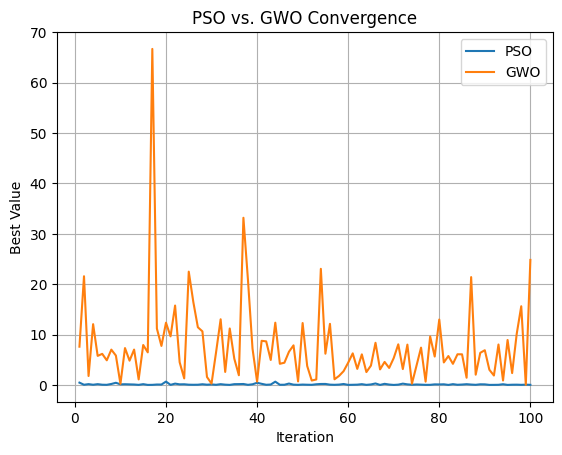

In [21]:


# Example usage
if __name__ == "__main__":
    num_particles = 30
    num_wolves = 30
    num_dimensions = 2
    num_iterations = 100

    # Run PSO and GWO
    pso_best_solution, pso_best_value = particle_swarm_optimization(num_dimensions, num_particles, num_iterations, 0.7, 1.5, 1.5)
    gwo_best_solution, gwo_best_value = grey_wolf_optimization(num_wolves, num_dimensions, num_iterations)
    
    print("Best Solution (PSO):", pso_best_solution)
    print("Best Value (PSO):", pso_best_value)
    print("Best Solution (GWO):", gwo_best_solution)
    print("Best Value (GWO):", gwo_best_value)
    
    # Plot convergence curves
    pso_values = []  # Store PSO values for each iteration
    gwo_values = []  # Store GWO values for each iteration
    
    for iteration in range(num_iterations):
        # Run PSO
        pso_best_solution, pso_best_value = particle_swarm_optimization(num_dimensions, num_particles, 1, 0.7, 1.5, 1.5)
        pso_values.append(pso_best_value)
        
        # Run GWO
        gwo_best_solution, gwo_best_value = grey_wolf_optimization(num_wolves, num_dimensions, 1)
        gwo_values.append(gwo_best_value)
    
    # Plot the convergence curves
    plt.figure()
    plt.plot(range(1, num_iterations + 1), pso_values, label='PSO')
    plt.plot(range(1, num_iterations + 1), gwo_values, label='GWO')
    plt.xlabel('Iteration')
    plt.ylabel('Best Value')
    plt.title('PSO vs. GWO Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
